In [22]:
import tensorflow as tf
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path = "/content/drive/MyDrive/AIN.csv"
df = pd.read_csv(path)


In [6]:
df2=df[['close','ds']]

In [19]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Scale the data between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df2[['close']])

# Create sequences of input and output data
n_steps = 30  # Number of time steps to use for each input
X = []
y = []
for i in range(n_steps, len(scaled_data)):
    X.append(scaled_data[i - n_steps:i, 0])
    y.append(scaled_data[i, 0])
X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
split_ratio = 0.8  # Percentage of data to use for training
split_index = int(split_ratio * len(X))
x_train, y_train = X[:split_index], y[:split_index]
x_test, y_test = X[split_index:], y[split_index:]

# Reshape the input data to fit the LSTM model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [14]:
df2['close']

0       18.199900
1       18.199900
2       18.318853
3       18.080944
4       18.199900
          ...    
8380    86.370000
8381    88.330000
8382    89.170000
8383    89.970000
8384    90.970000
Name: close, Length: 8385, dtype: float64

In [24]:
def create_long_short_term_memory_model(x_train):
    model = Sequential()
    # 1st layer with Dropout regularisation
    # * units = add 100 neurons is the dimensionality of the output space
    # * return_sequences = True to stack LSTM layers so the next LSTM layer has a three-dimensional sequence input
    # * input_shape => Shape of the training dataset
    model.add(LSTM(units=100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    # 20% of the layers will be dropped
    model.add(Dropout(0.2))
    # 2nd LSTM layer
    # * units = add 50 neurons is the dimensionality of the output space
    # * return_sequences = True to stack LSTM layers so the next LSTM layer has a three-dimensional sequence input
    model.add(LSTM(units=50, return_sequences=True))
    # 20% of the layers will be dropped
    model.add(Dropout(0.2))
    # 3rd LSTM layer
    # * units = add 50 neurons is the dimensionality of the output space
    # * return_sequences = True to stack LSTM layers so the next LSTM layer has a three-dimensional sequence input
    model.add(LSTM(units=50, return_sequences=True))
    # 50% of the layers will be dropped
    model.add(Dropout(0.5))
    # 4th LSTM layer
    # * units = add 50 neurons is the dimensionality of the output space
    model.add(LSTM(units=50))
    # 50% of the layers will be dropped
    model.add(Dropout(0.5))
    # Dense layer that specifies an output of one unit
    model.add(Dense(units=1))
    model.summary()
    
    return model

In [25]:
# Define and compile the LSTM model
model = create_long_short_term_memory_model(x_train)
model.compile(optimizer='adam', loss='mean_squared_error', metrics='mse')

# Fit the model to the training data
epochs = 100  # Number of training epochs
batch_size = 32  # Batch size for training
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=1)
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test),
                    callbacks=[callback])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 30, 100)           40800     
                                                                 
 dropout_8 (Dropout)         (None, 30, 100)           0         
                                                                 
 lstm_9 (LSTM)               (None, 30, 50)            30200     
                                                                 
 dropout_9 (Dropout)         (None, 30, 50)            0         
                                                                 
 lstm_10 (LSTM)              (None, 30, 50)            20200     
                                                                 
 dropout_10 (Dropout)        (None, 30, 50)            0         
                                                                 
 lstm_11 (LSTM)              (None, 50)               

53/53 [==============================] - 6s 46ms/step


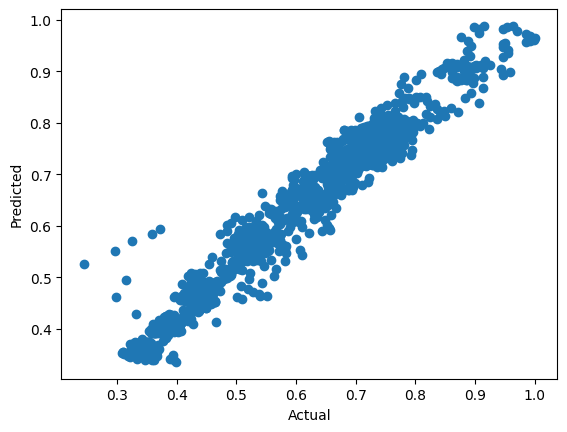

In [26]:
import matplotlib.pyplot as plt

# Generate predictions for the test data
y_pred = model.predict(x_test)

plt.figure(figsize=(12, 6))
plt.plot(y_test, color='blue', label='True')
plt.plot(y_pred, color='red', label='Predicted')
plt.title('LSTM Model Prediction')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

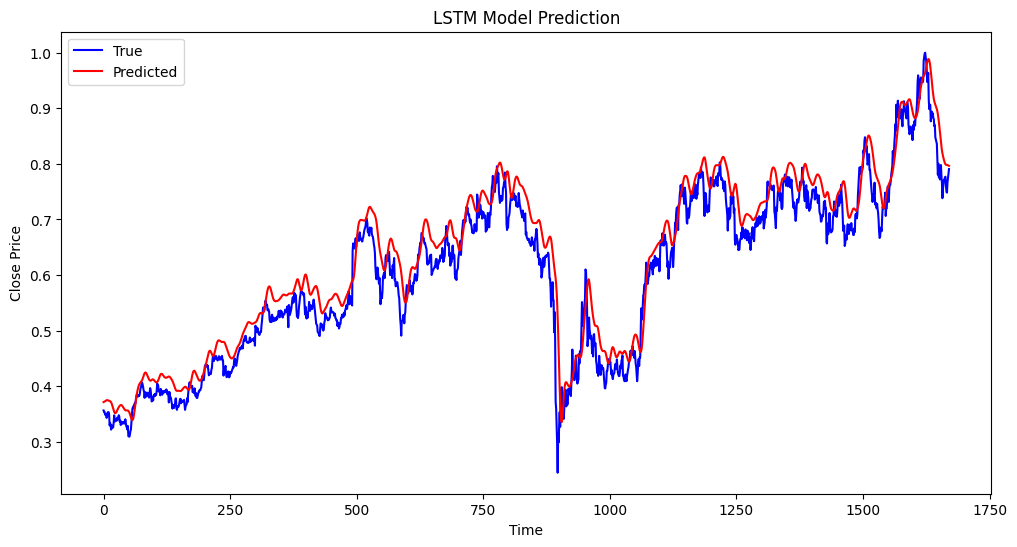

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, color='blue', label='True')
plt.plot(y_pred, color='red', label='Predicted')
plt.title('LSTM Model Prediction')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()